In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('compiled_data.csv')

In [22]:
#Dropping Smiles, Standard Type, Standard Values and Standard Units as they have no relevance in predecting activity of a molecule
df=df.drop(['Smiles', 'Standard Type', 'Standard Value', 'Standard Units'], axis=1)

Checking Class Imbalance

Activity Label
1    8095
0    4567
Name: count, dtype: int64


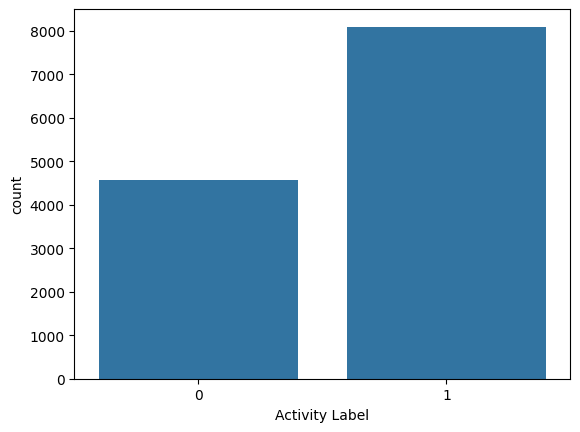

In [23]:
print(df['Activity Label'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Activity Label'])
plt.show()

<h1>Feature Selection</h1>

<h3>For Structural Fingerprints<h3>

In [24]:
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

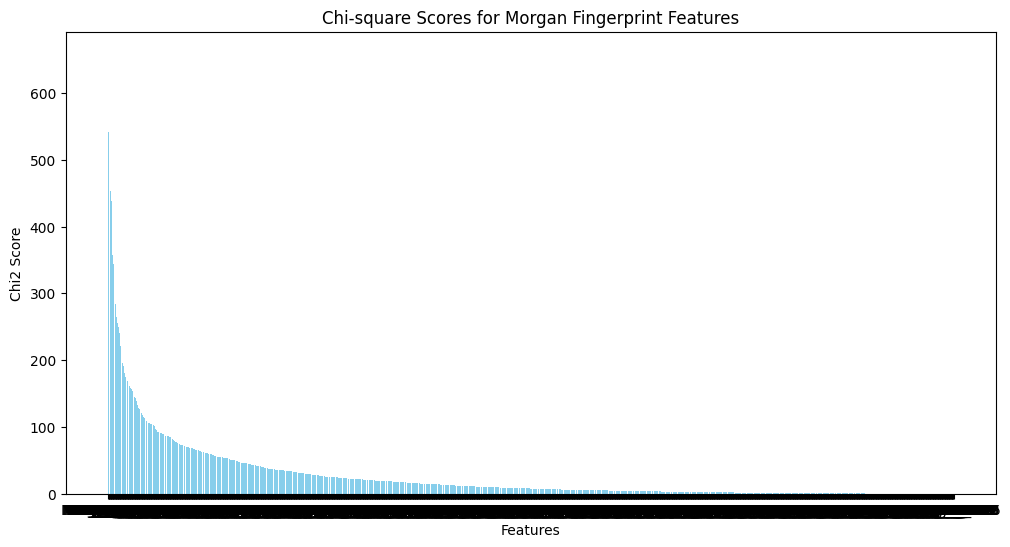

In [25]:
#morgan fingerprint
mgfeatures = [col for col in df.columns if col.startswith('Morgan')]
x=df[mgfeatures]
y=df['Activity Label']

chi2_scores, p_values = chi2(x, y)

chi2_df = pd.DataFrame({"Feature": mgfeatures, "Chi2 Score": chi2_scores})
chi2_df = chi2_df.sort_values(by="Chi2 Score", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(chi2_df["Feature"][:2048], chi2_df["Chi2 Score"][:2048], color="skyblue")
plt.xlabel("Features")
plt.ylabel("Chi2 Score")
plt.title("Chi-square Scores for Morgan Fingerprint Features")
plt.show()

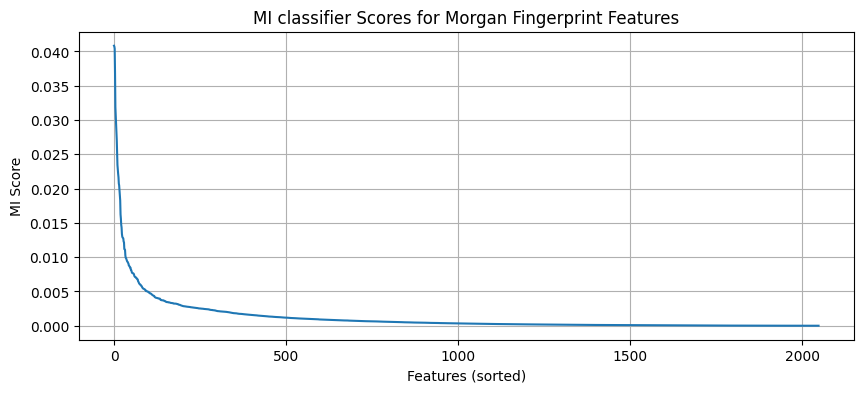

In [27]:
mi_scores = mutual_info_classif(x, y, discrete_features=True)
mi_scores_sorted = np.sort(mi_scores)[::-1]

plt.figure(figsize=(10,4))
plt.plot(mi_scores_sorted)
plt.xlabel("Features (sorted)")
plt.ylabel("MI Score")
plt.title("MI classifier Scores for Morgan Fingerprint Features")
plt.grid(True)
plt.show()

In [28]:
a = df.loc[:, df.columns.str.startswith("Morgan")]
b = df["Activity Label"]

chi2_selector = SelectKBest(chi2, k=150)
mi_selector = SelectKBest(mutual_info_classif, k=150)

mi_selector.fit(a, b)
chi2_selector.fit(a, b)

mi_mgfeatures = a.columns[mi_selector.get_support()]
chi2_mgfeatures = a.columns[chi2_selector.get_support()]

combined_features = pd.Index(mi_mgfeatures.tolist() + chi2_mgfeatures.tolist()).unique()

selected_mgfeatures= a[combined_features]

In [29]:
selected_mgfeatures.head()

,Morgan_25,Morgan_31,Morgan_59,Morgan_65,Morgan_84,Morgan_119,Morgan_131,Morgan_149,Morgan_160,Morgan_166,...,Morgan_1823,Morgan_1855,Morgan_1863,Morgan_1884,Morgan_1902,Morgan_1930,Morgan_1948,Morgan_2014,Morgan_2033,Morgan_2041
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [30]:
df=df.drop([col for col in df.columns if col.startswith('Morgan')], axis=1)
df = pd.concat([df, selected_mgfeatures], axis=1)
df.head()

,Activity Label,MolWt,LogP,HDonors,HAcceptors,TPSA,RotatableBonds,AromaticProportion,HeavyAtoms,NumRings,...,Morgan_1823,Morgan_1855,Morgan_1863,Morgan_1884,Morgan_1902,Morgan_1930,Morgan_1948,Morgan_2014,Morgan_2033,Morgan_2041
0,1,977.123,-1.0608,13,13,396.07,30,0.086957,69,2,...,0,0,0,0,0,0,0,0,0,0
1,0,620.541,2.9198,6,6,165.06,14,0.300000,40,2,...,0,0,0,0,0,0,0,0,0,0
2,0,805.926,1.9623,9,9,260.56,22,0.275862,58,3,...,0,1,0,0,0,0,0,0,0,0
3,1,732.807,-1.1643,9,13,300.67,18,0.415094,53,4,...,0,0,0,0,0,0,0,1,0,0
4,1,396.401,2.0840,1,6,89.40,5,0.586207,29,4,...,0,0,0,1,1,0,0,0,0,0


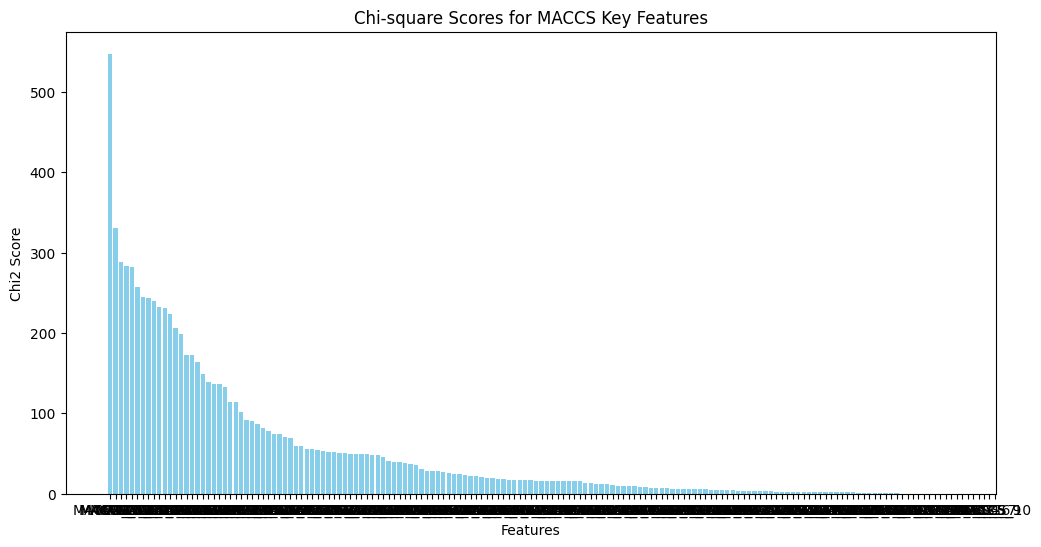

In [31]:
#MACCS key
maccsfeatures = [col for col in df.columns if col.startswith('MACCS')]
x=df[maccsfeatures]
y=df['Activity Label']

chi2_scores, p_values = chi2(x, y)

chi2_df = pd.DataFrame({"Feature": maccsfeatures, "Chi2 Score": chi2_scores})
chi2_df = chi2_df.sort_values(by="Chi2 Score", ascending=False) 

plt.figure(figsize=(12, 6))
plt.bar(chi2_df["Feature"][:166], chi2_df["Chi2 Score"][:166], color="skyblue")
plt.xlabel("Features")
plt.ylabel("Chi2 Score")
plt.title("Chi-square Scores for MACCS Key Features")
plt.show()

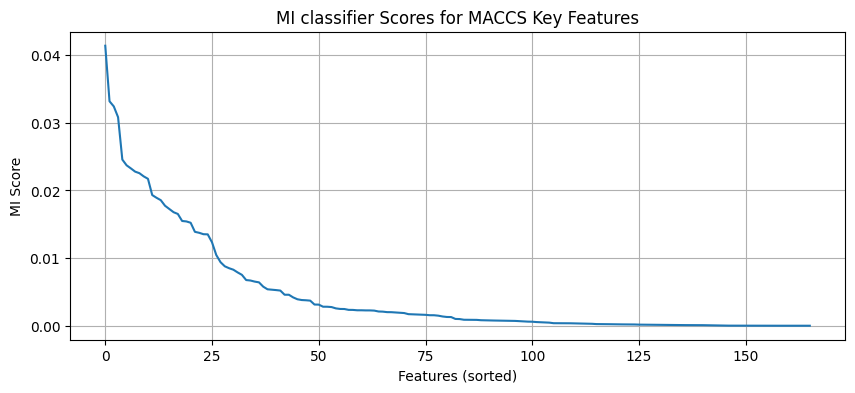

In [32]:
mi_scores = mutual_info_classif(x, y, discrete_features=True)
mi_scores_sorted = np.sort(mi_scores)[::-1]

plt.figure(figsize=(10,4))
plt.plot(mi_scores_sorted)
plt.title("Mutual Information Scores - Sorted")
plt.xlabel("Features (sorted)")
plt.ylabel("MI Score")
plt.title("MI classifier Scores for MACCS Key Features")
plt.grid(True)
plt.show()

In [33]:
a = df.loc[:, df.columns.str.startswith("MACCS")]
b = df["Activity Label"]

chi2_selector = SelectKBest(chi2, k=30)
mi_selector = SelectKBest(mutual_info_classif, k=30)

mi_selector.fit(a, b)
chi2_selector.fit(a, b)

mi_maccsfeatures = a.columns[mi_selector.get_support()]
chi2_maccsfeatures = a.columns[chi2_selector.get_support()]

combined_features = pd.Index(mi_maccsfeatures.tolist() + chi2_maccsfeatures.tolist()).unique()

selected_maccsfeatures= a[combined_features]

In [34]:
selected_maccsfeatures.head()

,MACCS_42,MACCS_65,MACCS_66,MACCS_77,MACCS_78,MACCS_79,MACCS_84,MACCS_87,MACCS_89,MACCS_92,...,MACCS_38,MACCS_41,MACCS_50,MACCS_59,MACCS_62,MACCS_64,MACCS_76,MACCS_99,MACCS_106,MACCS_108
0,0,0,1,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [35]:
df=df.drop((col for col in df.columns if col.startswith('MACCS')), axis=1)
df = pd.concat([df, selected_maccsfeatures], axis=1)
df.head()

,Activity Label,MolWt,LogP,HDonors,HAcceptors,TPSA,RotatableBonds,AromaticProportion,HeavyAtoms,NumRings,...,MACCS_38,MACCS_41,MACCS_50,MACCS_59,MACCS_62,MACCS_64,MACCS_76,MACCS_99,MACCS_106,MACCS_108
0,1,977.123,-1.0608,13,13,396.07,30,0.086957,69,2,...,0,0,0,0,0,0,0,0,0,0
1,0,620.541,2.9198,6,6,165.06,14,0.300000,40,2,...,0,0,0,0,0,0,0,0,0,0
2,0,805.926,1.9623,9,9,260.56,22,0.275862,58,3,...,0,0,0,0,0,0,0,0,0,0
3,1,732.807,-1.1643,9,13,300.67,18,0.415094,53,4,...,1,0,0,0,1,0,0,0,0,0
4,1,396.401,2.0840,1,6,89.40,5,0.586207,29,4,...,0,0,0,0,1,0,0,0,1,0


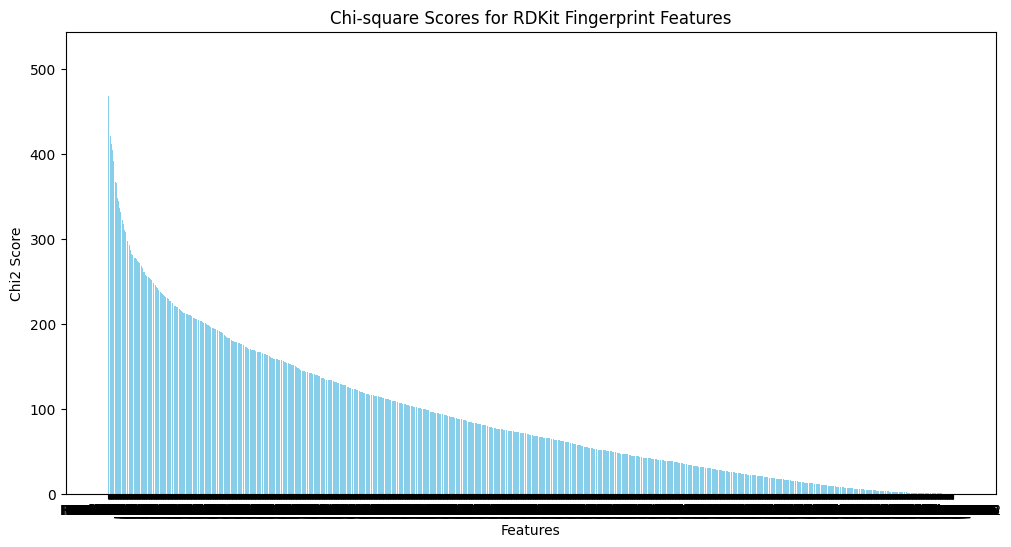

In [36]:
#RDKit Fingerprint
rdkitfeatures = [col for col in df.columns if col.startswith('RDKitFP')]
x=df[rdkitfeatures]
y=df['Activity Label']

chi2_scores, p_values = chi2(x, y)

chi2_df = pd.DataFrame({"Feature": rdkitfeatures, "Chi2 Score": chi2_scores})
chi2_df = chi2_df.sort_values(by="Chi2 Score", ascending=False) 

plt.figure(figsize=(12, 6))
plt.bar(chi2_df["Feature"][:2048], chi2_df["Chi2 Score"][:2048], color="skyblue")
plt.xlabel("Features")
plt.ylabel("Chi2 Score")
plt.title("Chi-square Scores for RDKit Fingerprint Features")
plt.show()

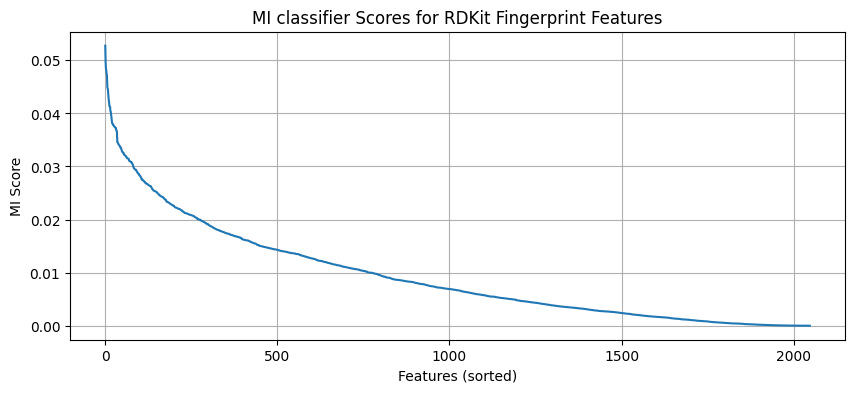

In [37]:
mi_scores = mutual_info_classif(x, y, discrete_features=True)
mi_scores_sorted = np.sort(mi_scores)[::-1]

plt.figure(figsize=(10,4))
plt.plot(mi_scores_sorted)
plt.title("Mutual Information Scores - Sorted")
plt.xlabel("Features (sorted)")
plt.ylabel("MI Score")
plt.title("MI classifier Scores for RDKit Fingerprint Features")
plt.grid(True)
plt.show()

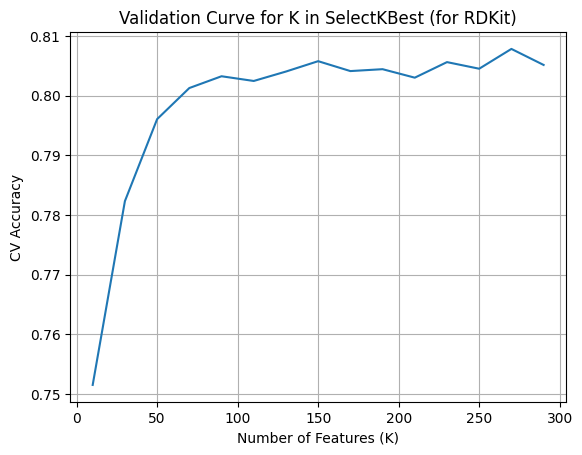

In [38]:
k_values = list(range(10, 300, 20))
scores = []
for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    x_new = selector.fit_transform(x, y)
    score = cross_val_score(RandomForestClassifier(), x_new, y, cv=5).mean()
    scores.append(score)

plt.plot(k_values, scores)
plt.xlabel("Number of Features (K)")
plt.ylabel("CV Accuracy")
plt.title("Validation Curve for K in SelectKBest (for RDKit)")
plt.grid()
plt.show()

In [39]:
a = df.loc[:, df.columns.str.startswith("RDKitFP")]
b = df["Activity Label"]

chi2_selector = SelectKBest(chi2, k=130)
mi_selector = SelectKBest(mutual_info_classif, k=130)

mi_selector.fit(a, b)
chi2_selector.fit(a, b)

mi_rdkitfeatures = a.columns[mi_selector.get_support()]
chi2_rdkitfeatures = a.columns[chi2_selector.get_support()]

combined_features = pd.Index(mi_rdkitfeatures.tolist() + chi2_rdkitfeatures.tolist()).unique()

selected_rdkitfeatures= a[combined_features]

In [40]:
selected_rdkitfeatures.head()

,RDKitFP_10,RDKitFP_19,RDKitFP_22,RDKitFP_38,RDKitFP_53,RDKitFP_94,RDKitFP_98,RDKitFP_101,RDKitFP_102,RDKitFP_159,...,RDKitFP_1738,RDKitFP_1760,RDKitFP_1766,RDKitFP_1844,RDKitFP_1853,RDKitFP_1864,RDKitFP_1880,RDKitFP_1894,RDKitFP_1897,RDKitFP_2026
0,1,0,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0
2,1,1,0,1,0,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,1
3,1,0,1,1,1,1,0,1,1,1,...,1,1,0,1,0,0,0,1,0,0
4,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,0,1,1,1,1,0


In [41]:
df=df.drop((col for col in df.columns if col.startswith('RDKitFP')), axis=1)
df = pd.concat([df, selected_rdkitfeatures], axis=1)
df.head()

,Activity Label,MolWt,LogP,HDonors,HAcceptors,TPSA,RotatableBonds,AromaticProportion,HeavyAtoms,NumRings,...,RDKitFP_1738,RDKitFP_1760,RDKitFP_1766,RDKitFP_1844,RDKitFP_1853,RDKitFP_1864,RDKitFP_1880,RDKitFP_1894,RDKitFP_1897,RDKitFP_2026
0,1,977.123,-1.0608,13,13,396.07,30,0.086957,69,2,...,1,0,0,1,0,0,0,1,0,0
1,0,620.541,2.9198,6,6,165.06,14,0.300000,40,2,...,0,1,0,0,1,0,0,0,0,0
2,0,805.926,1.9623,9,9,260.56,22,0.275862,58,3,...,1,0,0,1,1,0,0,1,0,1
3,1,732.807,-1.1643,9,13,300.67,18,0.415094,53,4,...,1,1,0,1,0,0,0,1,0,0
4,1,396.401,2.0840,1,6,89.40,5,0.586207,29,4,...,1,0,1,1,0,1,1,1,1,0


<Axes: >

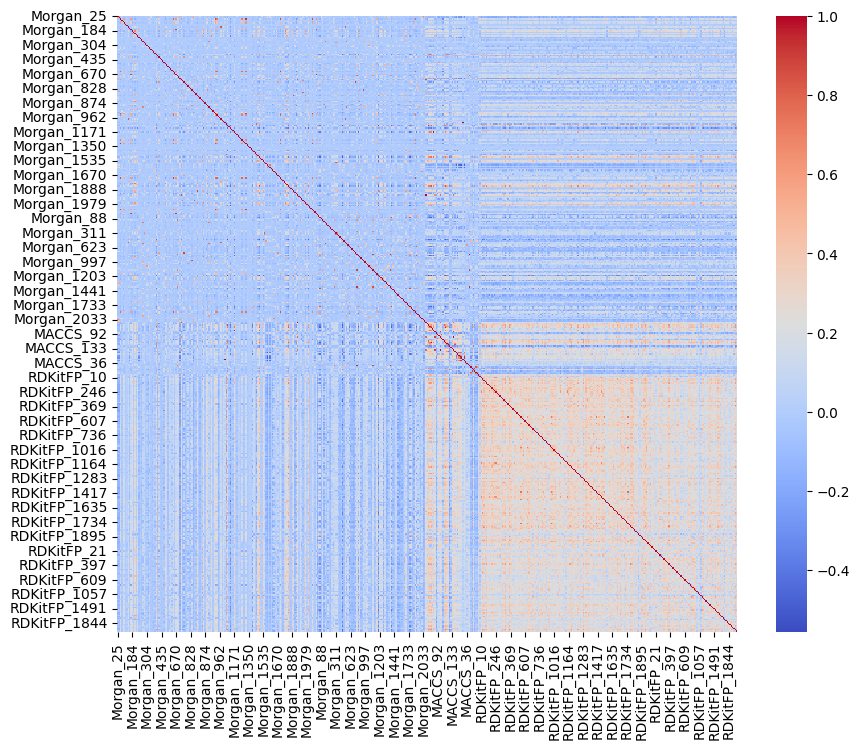

In [42]:
#checking redunancy for structural fingerprints
import seaborn as sns
import matplotlib.pyplot as plt

x=df[[col for col in df.columns if col.startswith('Morgan')] +
       [col for col in df.columns if col.startswith('MACCS')] +
       [col for col in df.columns if col.startswith('RDKitFP')]]
corr_matrix = pd.DataFrame(x).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')

<h3>For Molecular Descriptors<h3>

In [43]:
x=df[['AromaticProportion', 'BalabanJ', 'MolWt', 'LogP', 'HDonors', 'HAcceptors', 'TPSA', 'RotatableBonds', 'HeavyAtoms', 'NumRings', 'FractionCSP3', 'ValenceElectrons', 'Heteroatoms', 'Chi0', 'Chi1', 'Kappa1', 'HallKierAlpha' ]]
y=df['Activity Label']

correlation = x.corrwith(y)
print(correlation)

AromaticProportion   -0.084730
BalabanJ             -0.037419
MolWt                 0.081452
LogP                 -0.020161
HDonors              -0.003009
HAcceptors            0.106875
TPSA                  0.055965
RotatableBonds       -0.038139
HeavyAtoms            0.083177
NumRings              0.131780
FractionCSP3          0.050824
ValenceElectrons      0.076475
Heteroatoms           0.145168
Chi0                  0.082666
Chi1                  0.079981
Kappa1                0.051425
HallKierAlpha        -0.073987
dtype: float64


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12662 entries, 0 to 12661
Columns: 487 entries, Activity Label to RDKitFP_2026
dtypes: float64(10), int64(477)
memory usage: 47.0 MB


In [45]:
#removing the descriptors with negative correlation
df=df.drop(['AromaticProportion', 'BalabanJ', 'LogP', 'HDonors', 'RotatableBonds', 'HallKierAlpha'], axis=1)
df.head()

,Activity Label,MolWt,HAcceptors,TPSA,HeavyAtoms,NumRings,FractionCSP3,ValenceElectrons,Heteroatoms,Chi0,...,RDKitFP_1738,RDKitFP_1760,RDKitFP_1766,RDKitFP_1844,RDKitFP_1853,RDKitFP_1864,RDKitFP_1880,RDKitFP_1894,RDKitFP_1897,RDKitFP_2026
0,1,977.123,13,396.07,69,2,0.652174,386,23,52.172269,...,1,0,0,1,0,0,0,1,0,0
1,0,620.541,6,165.06,40,2,0.448276,218,11,29.982399,...,0,1,0,0,1,0,0,0,0,0
2,0,805.926,9,260.56,58,3,0.452381,314,16,43.103355,...,1,0,0,1,1,0,0,1,0,1
3,1,732.807,13,300.67,53,4,0.424242,282,20,38.492624,...,1,1,0,1,0,0,0,1,0,0
4,1,396.401,6,89.40,29,4,0.200000,148,9,20.595647,...,1,0,1,1,0,1,1,1,1,0


[0.09540394 0.07593343 0.12486994 0.05610894 0.07924493 0.09990022
 0.07472465 0.08946436 0.09312912 0.11420419 0.09701628]


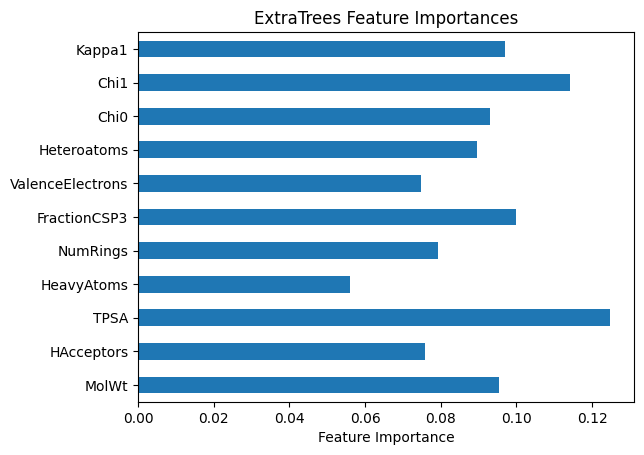

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
x=df[['MolWt', 'HAcceptors', 'TPSA', 'HeavyAtoms', 'NumRings', 'FractionCSP3', 'ValenceElectrons', 'Heteroatoms', 'Chi0', 'Chi1', 'Kappa1']]
y=df['Activity Label']
model=ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.xlabel("Feature Importance")
plt.title("ExtraTrees Feature Importances")
plt.show()

In [47]:
#checking feature importance with randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rfe_rf = RFE(estimator=rf, n_features_to_select=10)
rfe_rf.fit(X_train, y_train)

selected_rf_features = x.columns[rfe_rf.support_]
print("Selected features (RandomForest):", selected_rf_features.tolist())


Selected features (RandomForest): ['MolWt', 'HAcceptors', 'TPSA', 'NumRings', 'FractionCSP3', 'ValenceElectrons', 'Heteroatoms', 'Chi0', 'Chi1', 'Kappa1']


In [48]:
df=df.drop('HeavyAtoms', axis=1)
df.head()

,Activity Label,MolWt,HAcceptors,TPSA,NumRings,FractionCSP3,ValenceElectrons,Heteroatoms,Chi0,Chi1,...,RDKitFP_1738,RDKitFP_1760,RDKitFP_1766,RDKitFP_1844,RDKitFP_1853,RDKitFP_1864,RDKitFP_1880,RDKitFP_1894,RDKitFP_1897,RDKitFP_2026
0,1,977.123,13,396.07,2,0.652174,386,23,52.172269,32.189282,...,1,0,0,1,0,0,0,1,0,0
1,0,620.541,6,165.06,2,0.448276,218,11,29.982399,18.793509,...,0,1,0,0,1,0,0,0,0,0
2,0,805.926,9,260.56,3,0.452381,314,16,43.103355,27.368897,...,1,0,0,1,1,0,0,1,0,1
3,1,732.807,13,300.67,4,0.424242,282,20,38.492624,25.315479,...,1,1,0,1,0,0,0,1,0,0
4,1,396.401,6,89.40,4,0.200000,148,9,20.595647,13.968399,...,1,0,1,1,0,1,1,1,1,0


In [49]:
df.to_csv('final0.csv', index=False)